In [18]:
from sklearn.datasets import load_digits
digits=load_digits()

In [19]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [20]:
digits.data.shape

(1797, 64)

In [21]:
digits.images.shape

(1797, 8, 8)

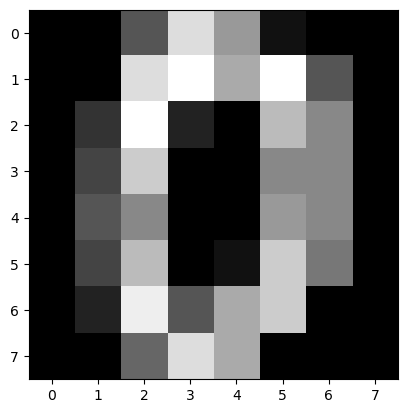

In [22]:
import matplotlib.pylab as plt 
x=digits.images[0]
plt.gray()
plt.imshow(x)

PREPROCESSING

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.2)

x_train[0]

array([ 0.,  0.,  7., 14.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,
        0.,  0.,  0.,  0.,  2., 14.,  2., 14.,  0.,  0.,  0.,  0.,  0.,
        0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,
        0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
       14.,  8., 10.,  0.,  0.,  0.,  7., 12., 12., 12., 15.,  2.])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
x_train[0]

array([0.        , 0.        , 0.4375    , 0.875     , 0.3125    ,
       0.        , 0.        , 0.        , 0.        , 0.35714286,
       1.        , 1.        , 0.6875    , 0.        , 0.        ,
       0.        , 0.        , 0.13333333, 0.875     , 0.125     ,
       0.875     , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3125    , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5       , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6875    , 0.75      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.6875    , 1.        , 0.875     , 0.5       , 0.625     ,
       0.        , 0.        , 0.        , 0.4375    , 0.75      ,
       0.75      , 0.75      , 0.9375    , 0.125     ])

classification 

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train=accuracy_score(y_true= y_train, y_pred= y_pred_train)
    acc_test=accuracy_score(y_true= y_test, y_pred= y_pred_test)
    r=recall_score(y_true= y_test, y_pred= y_pred_test, average='weighted')
    p=precision_score(y_true= y_test, y_pred= y_pred_test, average='weighted')
    print(f"acc_train {acc_train}, acc_test {acc_test}, precision {p}, recall {r}")
    return acc_train, acc_test, p, r

Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8  )
rf.fit(x_train, y_train)

y_pred_train= rf.predict(x_train)
y_pred_test=  rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train 1.0, acc_test 0.9492350486787204, precision 0.9506168959468525, recall 0.9492350486787204


sVM

In [28]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)

y_pred_train= svm.predict(x_train)
y_pred_test=  svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train 0.9860724233983287, acc_test 0.9673157162726008, precision 0.9681853055428632, recall 0.9673157162726008


ANN

In [29]:
from sklearn.neural_network import MLPClassifier
ann= MLPClassifier(hidden_layer_sizes=128, activation='relu', solver='adam', batch_size=32)
ann.fit(x_train, y_train)

y_pred_train= ann.predict(x_train)
y_pred_test=  ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train 1.0, acc_test 0.9568845618915159, precision 0.9571025067742271, recall 0.9568845618915159


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


knn

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

y_pred_train= knn.predict(x_train)
y_pred_test=knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn =calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train 0.9637883008356546, acc_test 0.9513212795549374, precision 0.951712677539321, recall 0.9513212795549374


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

comparison

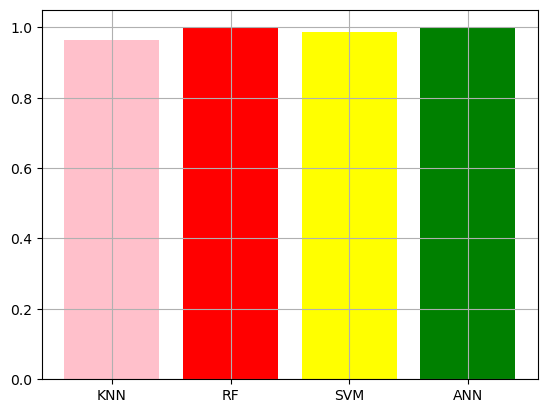

In [31]:
import matplotlib.pyplot as plt
acc_train= [ acc_train_knn,  acc_train_rf, acc_train_svm,  acc_train_ann]
title=[ "KNN",  "RF", "SVM",  "ANN"]
colors=['pink','red', 'yellow', 'green']
plt.bar(title, acc_train,color=colors)
plt.grid()
plt.show()

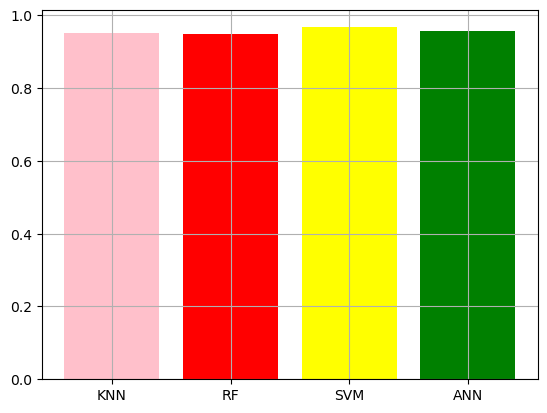

In [32]:
import matplotlib.pyplot as plt
acc_test= [ acc_test_knn,  acc_test_rf, acc_test_svm,  acc_test_ann]
title=[ "KNN",  "RF", "SVM",  "ANN"]
colors=['pink','red', 'yellow', 'green']
plt.bar(title, acc_test,color=colors)
plt.grid()
plt.show()